In [ ]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

In [ ]:
!pip install PyYAML==5.3.1

     |████████████████████████████████| 276kB 8.4MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=e6bc9d02d2f66d8235c059b8d1b20a41a496e00b829b4f5c24af895973d60c16
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!nvidia-smi

Sun Nov 15 09:02:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Cloning into 'apex'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 7456 (delta 0), reused 0 (delta 0), pack-reused 7455
Receiving objects: 100% (7456/7456), 13.91 MiB | 26.72 MiB/s, done.
Resolving deltas: 100% (5038/5038), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-933s_3di
Created temporary directory: /tmp/pip-req-tracker-eeznnuws
Created requirements tracker '/tmp/pip-req-tracker-eeznnuws'
Created temporary directory: /tmp/pip-install-mdzq_zf6
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-glvlxb83
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-eeznnuws'
    Running setup.py (path:/tmp/pip-req-build-glvlxb83/setup.py) egg_info 

In [ ]:
!gdown --id 1uWdQ2kn25RSQITtBHa9_zayplm27IXNC

Downloading...
From: https://drive.google.com/uc?id=1uWdQ2kn25RSQITtBHa9_zayplm27IXNC
To: /content/clothing.json
100% 199k/199k [00:00<00:00, 57.7MB/s]


In [ ]:
clothing = []
with open("clothing.json") as f:
    for line in f:
        clothing.append(json.loads(line))

In [ ]:
clothing[0]

{'annotation': [{'imageHeight': 312,
   'imageWidth': 147,
   'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.02040816326530612, 'y': 0.2532051282051282},
    {'x': 0.9931972789115646, 'y': 0.8108974358974359}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/4bb8fd9d-8d52-46c7-aa2a-9c18af10aed6___Data_xxl-top-4437-jolliy-original-imaekasxahykhd3t.jpeg',
 'extras': None}

In [ ]:
categories = []
for c in clothing:
  for a in c['annotation']:
    categories.extend(a['label'])
categories = list(set(categories))
categories.sort()
categories

['Jackets',
 'Jeans',
 'Shirts',
 'Shoes',
 'Skirts',
 'Tops',
 'Trousers',
 'Tshirts',
 'sunglasses']

In [ ]:
train_clothing, val_clothing = train_test_split(clothing, test_size=0.1,shuffle=True)
len(train_clothing), len(val_clothing)

(453, 51)

In [ ]:
row = train_clothing[69]

img = urllib.request.urlopen(row["content"])
img = Image.open(img)
img = img.convert('RGB')

img.save("demo_image.jpeg", "JPEG")

In [ ]:
img = cv2.cvtColor(cv2.imread(f'demo_image.jpeg'), cv2.COLOR_BGR2RGB)
img.shape

(286, 312, 3)

In [ ]:
class dataloader():
  def __init__(self,filename):
    self.filename=filename

  def list_of_annotations(self):
    clothing = []
    with open(self.filename) as f:
        for line in f:
            clothing.append(json.loads(line))
    return clothing

  def get_categories(self):
    categories = []
    for c in self.list_of_annotations():
      for a in c['annotation']:
        categories.extend(a['label'])
    categories = list(set(categories))
    categories.sort()
    print(categories)

  def save_sample(self,name,number):
    row = self.list_of_annotations()[number]

    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')

    img.save( f"{name}.jpeg", "JPEG")
    print("Image Saved")



In [ ]:
d1=dataloader("clothing.json")
annotation_list=d1.list_of_annotations()
d1.get_categories()

['Jackets', 'Jeans', 'Shirts', 'Shoes', 'Skirts', 'Tops', 'Trousers', 'Tshirts', 'sunglasses']


In [ ]:
d1.save_sample("demo_image",79)

Image Saved


In [ ]:
img = cv2.cvtColor(cv2.imread(f'demo_image.jpeg'), cv2.COLOR_BGR2RGB)
img.shape

(312, 154, 3)

In [ ]:
train_clothing, val_clothing = train_test_split(annotation_list, test_size=0.1,shuffle=True)
len(train_clothing),len(val_clothing)

(453, 51)

In [ ]:
class ProcessImage(dataloader):
  """ Add box around the image """
  def __init__(self,clothing):
    self.clothing=clothing

  def __call__(self,sample,img):
    for a in sample['annotation']:
      for label in a['label']:
        w = a['imageWidth']
        h = a['imageHeight']

        points = a['points']
        p1, p2 = points

        x1, y1 = p1['x'] * w, p1['y'] * h
        x2, y2 = p2['x'] * w, p2['y'] * h

        cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x2), int(y2)),
          color=(0, 255, 0),
          thickness=2
        )

        ((label_width, label_height), _) = cv2.getTextSize(
            label, 
            fontFace=cv2.FONT_HERSHEY_PLAIN,
            fontScale=1.75, 
            thickness=2
        )

        cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
          color=(0, 255, 0),
          thickness=cv2.FILLED
        )

        cv2.putText(
          img,
          label,
          org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
          fontFace=cv2.FONT_HERSHEY_PLAIN,
          fontScale=1.75,
          color=(255, 255, 255),
          thickness=2
        )
    

Image Saved


(-0.5, 145.5, 311.5, -0.5)

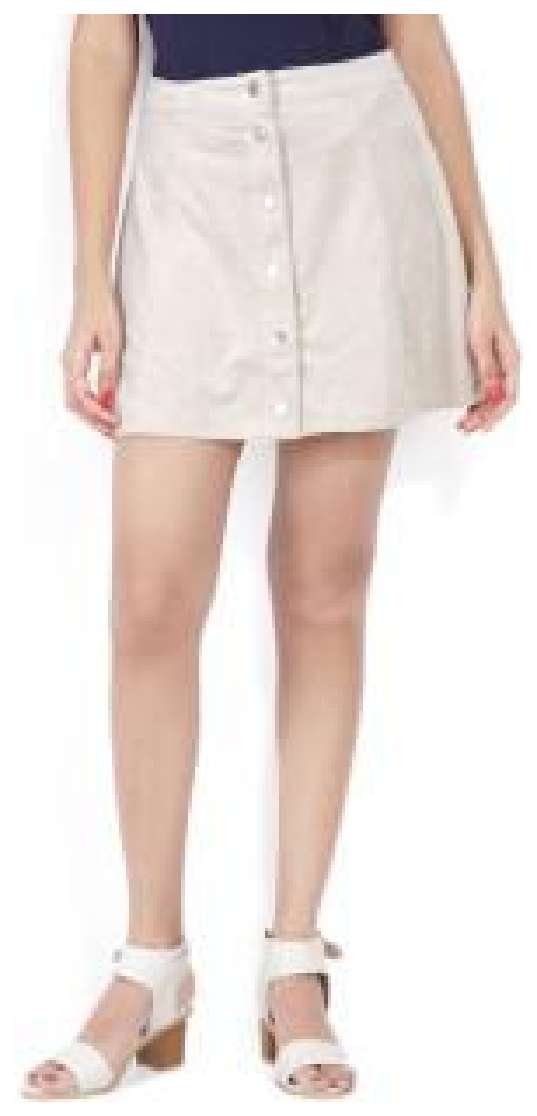

In [ ]:
d1.save_sample("demo_image",85)
img = cv2.cvtColor(cv2.imread(f'demo_image.jpeg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

(-0.5, 145.5, 311.5, -0.5)

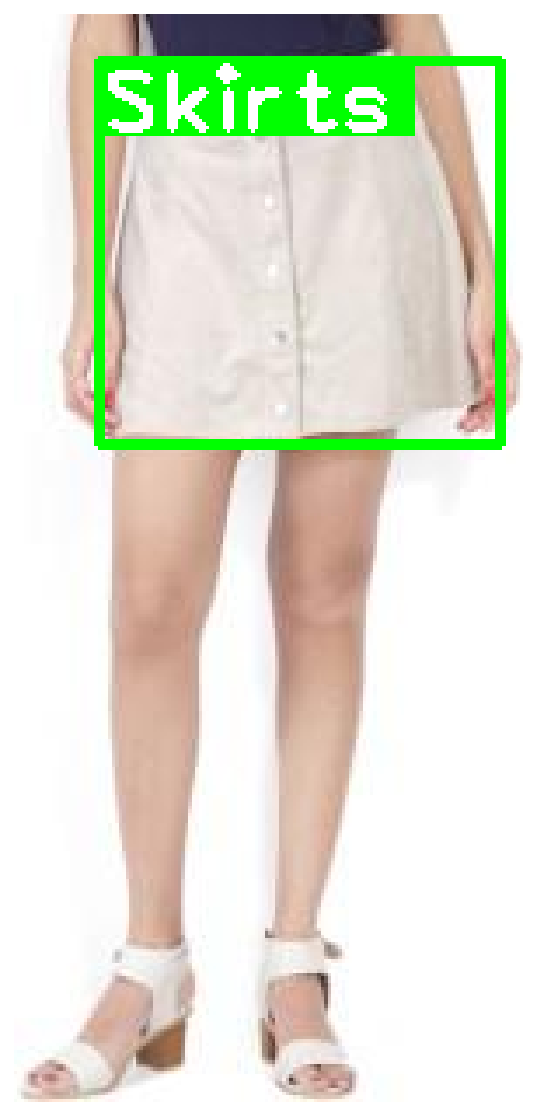

In [ ]:
sample=annotation_list[85]
p1=ProcessImage(annotation_list)
p1(sample,img)
plt.imshow(img)
plt.axis("off")

In [ ]:
class Convert_To_Yolo():
  def __init__(self,clothing, categories, dataset_type):
    self.clothing=clothing
    self.categories=categories
    self.dataset_type=dataset_type

  def createdataset(self):
    images_path = Path(f"clothing/images/{self.dataset_type}")
    images_path.mkdir(parents=True, exist_ok=True)

    labels_path = Path(f"clothing/labels/{self.dataset_type}")
    labels_path.mkdir(parents=True, exist_ok=True)

    for img_id, row in enumerate(tqdm(self.clothing)):

      image_name = f"{img_id}.jpeg"

      img = urllib.request.urlopen(row["content"])
      img = Image.open(img)
      img = img.convert("RGB")

      img.save(str(images_path / image_name), "JPEG")

      label_name = f"{img_id}.txt"

      with (labels_path / label_name).open(mode="w") as label_file:

        for a in row['annotation']:

          for label in a['label']:

            category_idx = categories.index(label)

            points = a['points']
            p1, p2 = points

            x1, y1 = p1['x'], p1['y']
            x2, y2 = p2['x'], p2['y']

            bbox_width = x2 - x1
            bbox_height = y2 - y1

            label_file.write(
              f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n"
            )

In [ ]:
trainset=Convert_To_Yolo(train_clothing, categories, 'train')
testset=Convert_To_Yolo(val_clothing, categories, 'val')

In [ ]:
trainset.createdataset()
testset.createdataset()

100%|██████████| 51/51 [00:10<00:00,  4.80it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

Cloning into 'yolov5'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 2911 (delta 12), reused 17 (delta 8), pack-reused 2884
Receiving objects: 100% (2911/2911), 6.34 MiB | 22.62 MiB/s, done.
Resolving deltas: 100% (1924/1924), done.
/content/yolov5
Note: checking out 'ec72eea62bf5bb86b0272f2e65e413957533507f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ec72eea Merge remote-tracking branch 'origin/master'


In [ ]:
!gdown --id 1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO -O data/clothing.yaml
!gdown --id 1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i -O models/yolov5x.yaml

Downloading...
From: https://drive.google.com/uc?id=1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO
To: /content/yolov5/data/clothing.yaml
100% 172/172 [00:00<00:00, 293kB/s]
Downloading...
From: https://drive.google.com/uc?id=1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i
To: /content/yolov5/models/yolov5x.yaml
100% 1.58k/1.58k [00:00<00:00, 1.50MB/s]


In [ ]:
!python train.py --img 640 --batch 4 --epochs 30 \
  --data ./data/clothing.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt \
  --name yolov5x_clothing --cache

{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='./data/clothing.yaml', device='', epochs=30, evolve=False, img_size=[640], multi_scale=False, name='yolov5x_clothing', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5x.pt')
Using CUDA Apex device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-11-15 09:33:55.486180: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

              from  n    params  module                             

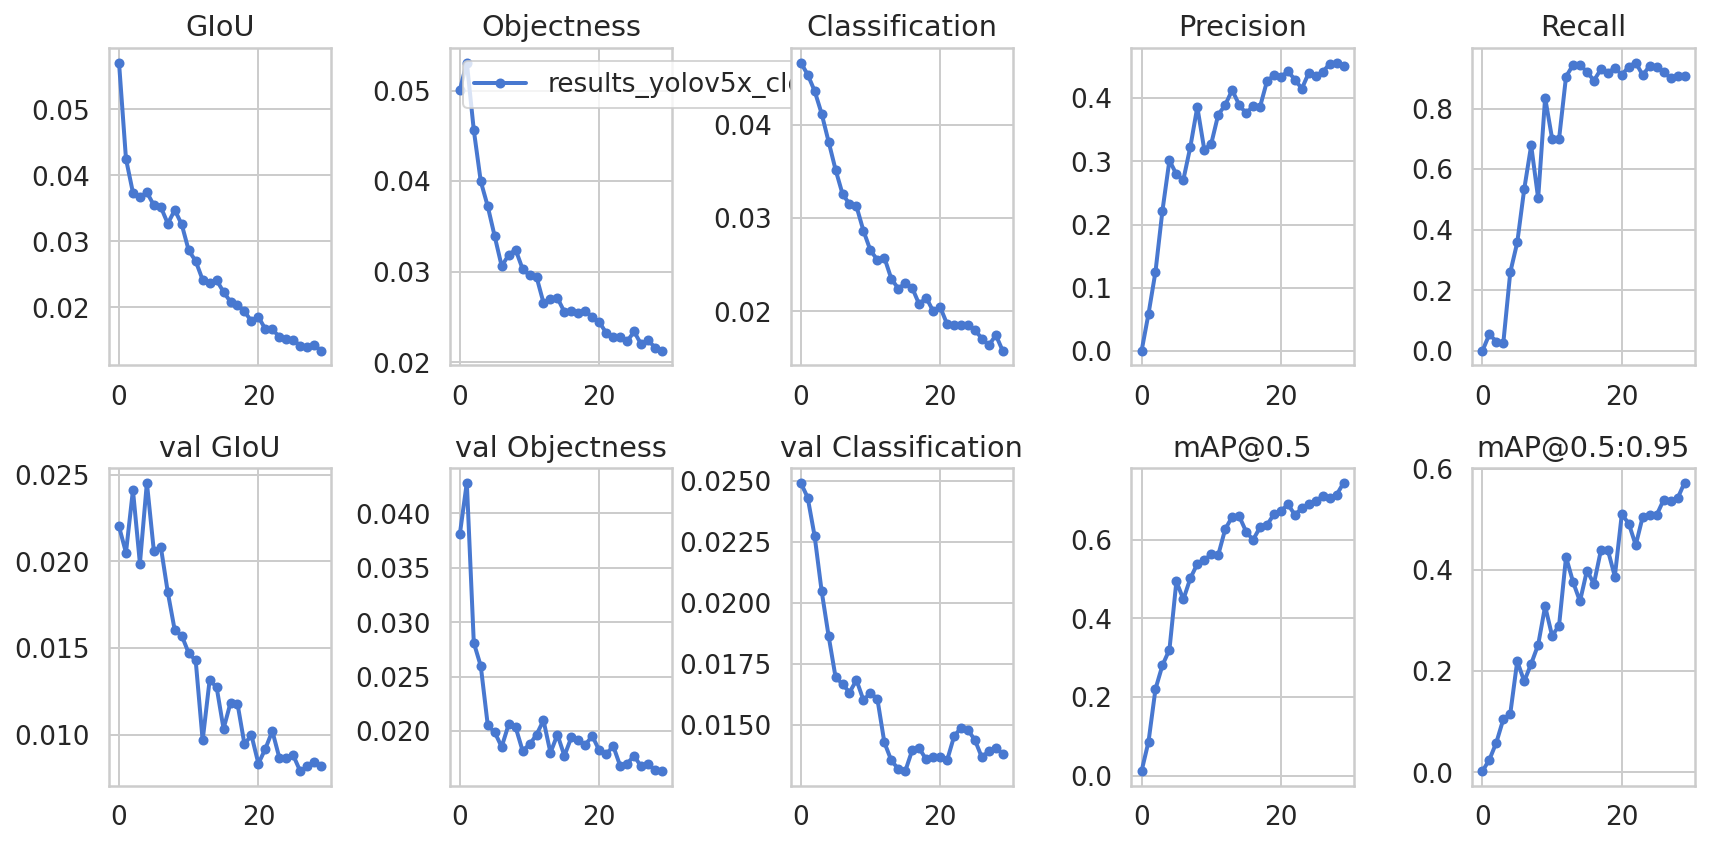

In [ ]:
from utils.utils import plot_results

plot_results();

In [ ]:
!find ../clothing/images/val/ -maxdepth 1 -type f | head -50 | xargs cp -t "./inference/images/"

In [ ]:
!python detect.py --weights weights/last_yolov5x_clothing.pt \
    --source ./inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', view_img=False, weights='weights/last_yolov5x_clothing.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

/content/yolov5/utils/utils.py:580: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  i, j = (x[:, 5:] > conf_thres).nonzero().t()
image 1/52 inference/images/0.jpeg: 320x640 1 sunglassess, Done. (0.037s)
image 2/52 inference/images/1.jpeg: 640x320 1 Skirtss, Done. (0.038s)
image 3/52 inference/images/10.jpeg: 640x448 Done. (0.028s)
image 4/52 inference/images/11.jpeg: 640x384 Done. (0.026s)
image 5/52 inference/images/12.jpeg: 640x256 1 Skirtss, Done. (0.022s)
image 6/52 

In [ ]:
class HelperClass():
  @staticmethod
  def load_image(img_path: Path, resize=True):
    img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
    return img
  @staticmethod
  def show_grid(image_paths):
    images = [HelperClass.load_image(img) for img in image_paths]
    images = torch.as_tensor(images)
    images = images.permute(0, 3, 1, 2)
    grid_img = torchvision.utils.make_grid(images, nrow=11)
    plt.figure(figsize=(24, 12))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis('off');

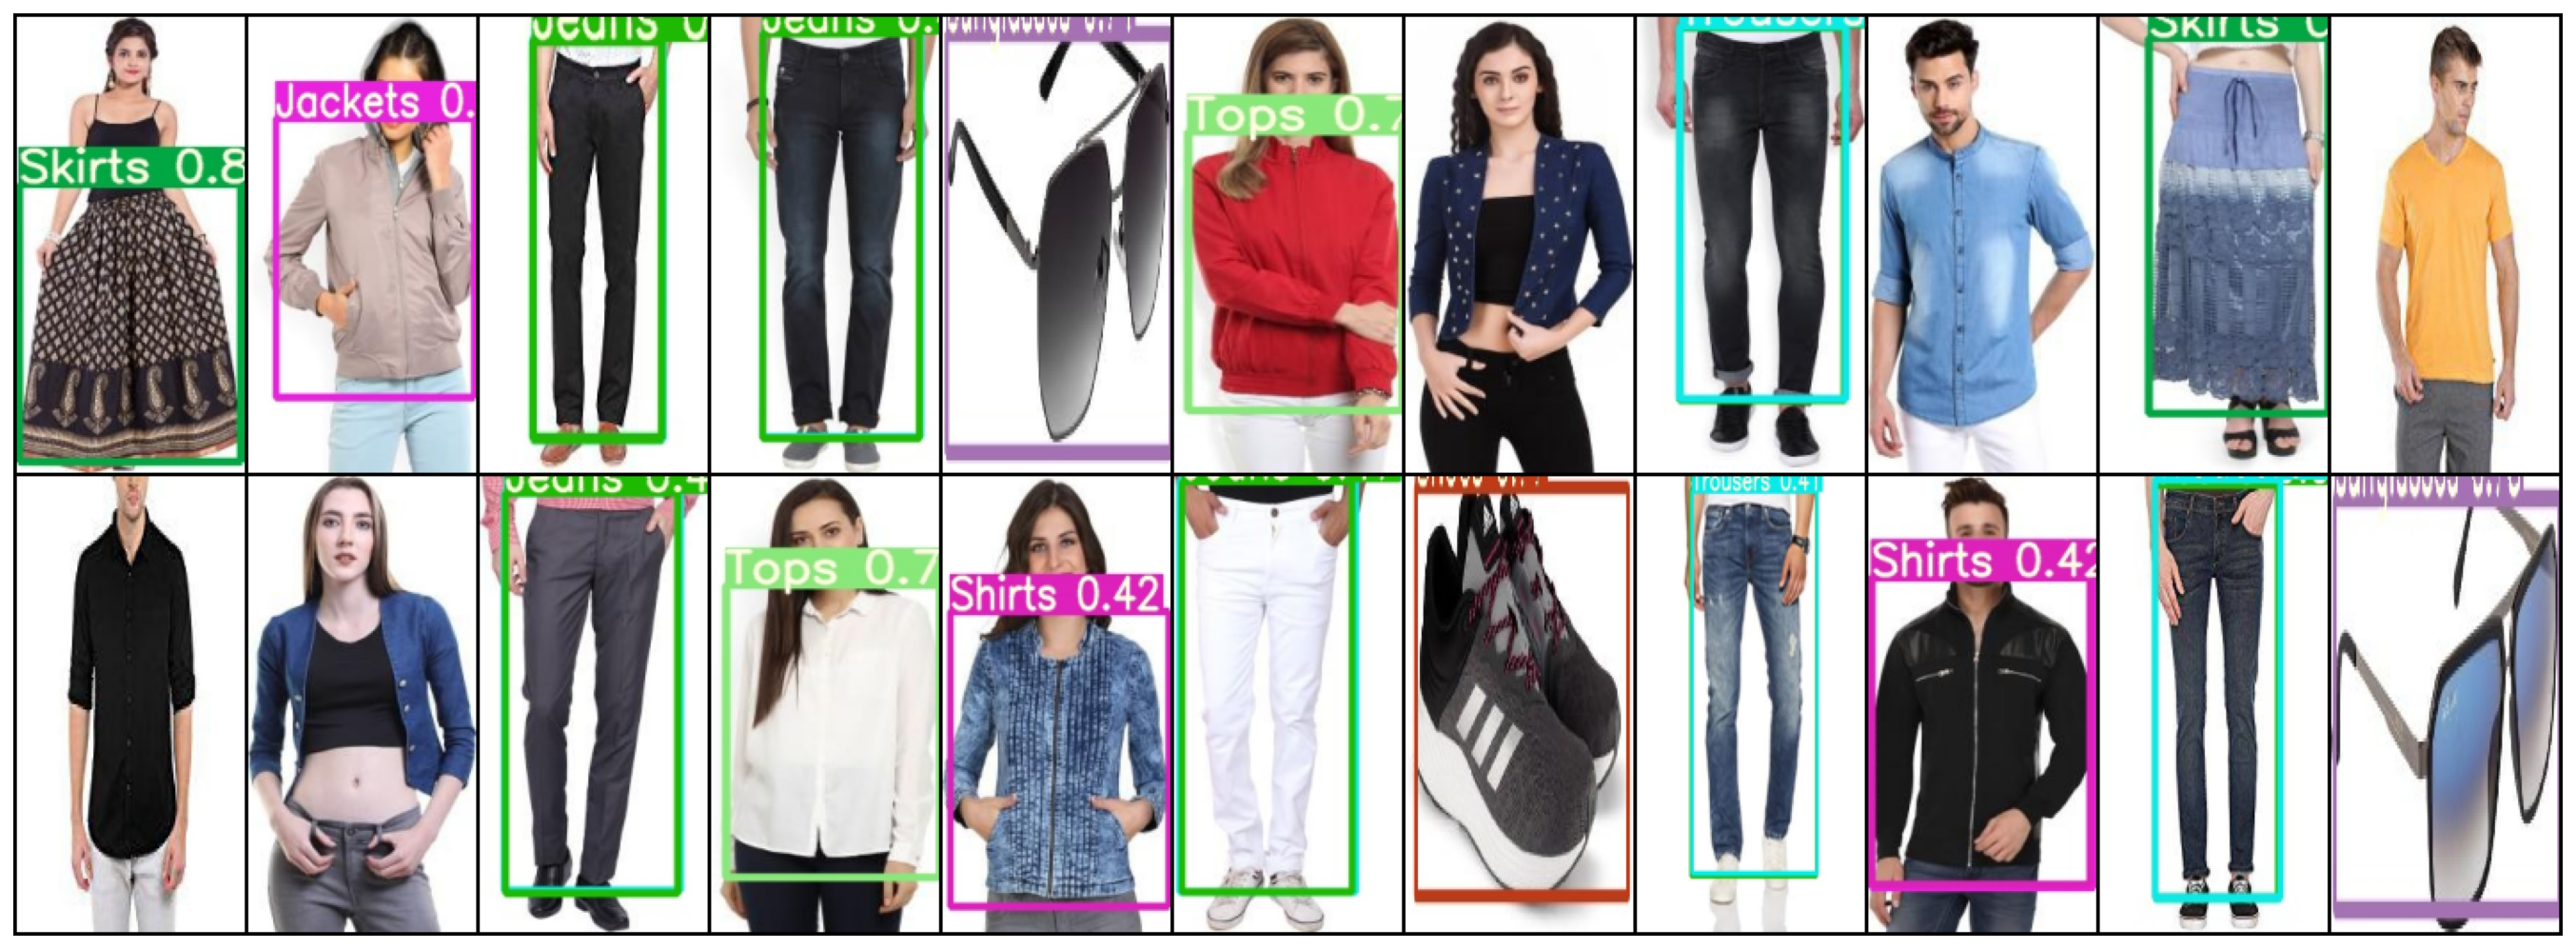

In [ ]:
img_paths = list(Path("inference/output").glob("*.jpeg"))[:22]
HelperClass.show_grid(img_paths)